# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
        n_classes = len(labels)

        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            x_class = X[y == label]
            mean_class = np.mean(x_class, axis=0)
            S_W += np.dot((x_class - mean_class).T, (x_class - mean_class))
        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
        S_B = np.zeros((n_features, n_features))
        mean = np.mean(X, axis=0)
        for label in labels:
            x_class = X[y == label]
            mean_class = np.mean(x_class, axis=0)
            S_B += len(x_class) * np.dot((mean_class - mean).reshape(-1, 1), (mean_class - mean).reshape(1, -1))
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        SW_inv = np.linalg.inv(S_W)
        SW_inv_SB = np.dot(SW_inv, S_B)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues, eigenvectors = np.linalg.eig(SW_inv_SB)
        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X, y):
        ########### Write Your Code Here ###########
        self.fit(X, y)
        return self.transform(X)
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        return np.dot(X, self.eigenvectors)

- <font size=4> Dimensionality reduction visualization<font>

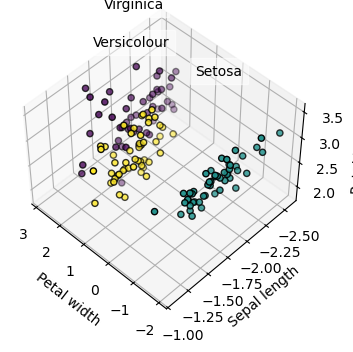

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [3]:
########### Write Your Code Here ###########
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

############################################

###  Visualization of MINIST

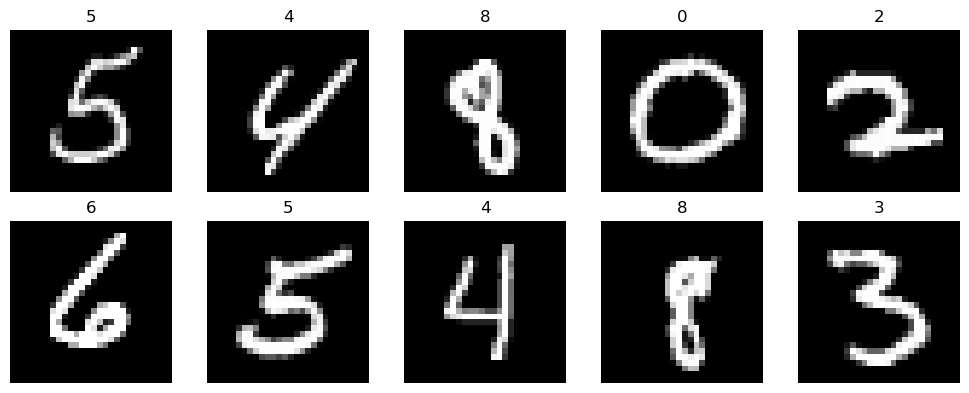

In [4]:
# Visualize MINIST
########### Write Your Code Here ###########
def plot_mnist_samples(X, y, n_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(n_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(str(y.iloc[i]))
    plt.tight_layout()
    plt.show()
plot_mnist_samples(X_train, y_train, n_samples=10)
############################################

### Fit  Model

In [5]:
########### Write Your Code Here ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train, y_train)
############################################

LinearDiscriminantAnalysis()

## Evaluate model

Accuracy: 0.87


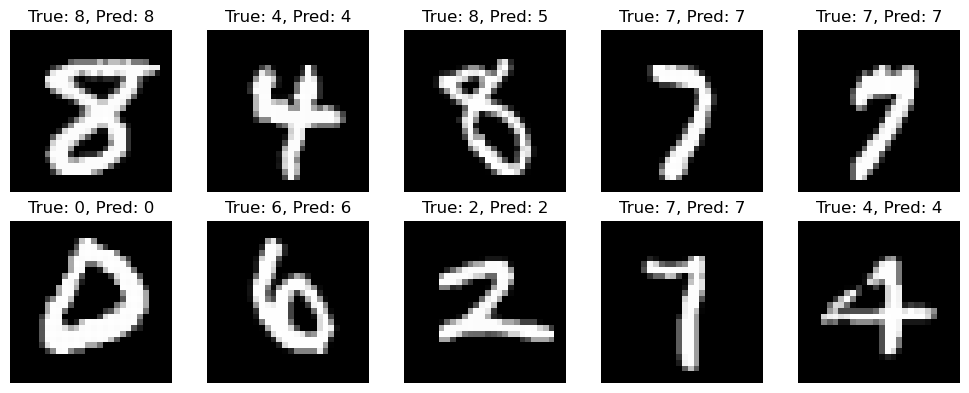

In [6]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

def plot_predictions(X, y_true, y_pred, n_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(n_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f'True: {int(y_true.iloc[i])}, Pred: {int(y_pred[i])}')
    plt.tight_layout()
    plt.show()
plot_predictions(X_test, y_test, y_pred, n_samples=10)
############################################


### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?